In [37]:
import coinmarketcappy as cmc
from cryptocmd import CmcScraper
import pandas as pd 
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
% matplotlib inline

# Plot styles
plt.style.use('seaborn-poster')
plt.style.use('fivethirtyeight')
plt.rcParams['axes.edgecolor'] = '#ffffff'
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['figure.facecolor'] = '#ffffff'
plt.rcParams['patch.edgecolor'] = '#ffffff'
plt.rcParams['patch.facecolor'] = '#ffffff'
plt.rcParams['savefig.edgecolor'] = '#ffffff'
plt.rcParams['savefig.facecolor'] = '#ffffff'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16


# Read in historical data for every coin on CMC. CSV is generated by cryptomarketcap-historical-prices scraper
df = pd.read_csv('~/Desktop/coindata.csv')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Market Cap'] = pd.to_numeric(df['Market Cap'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'])

#Pivot the table and take only rows after June 22, 2016
df_pivot = df[df['Date'] > '2016-06-22'].pivot(index='Date', columns='Coin', values='Market Cap').sort_index()


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
#Bitcoin Market Cap
bitcoin__market_cap = pd.DataFrame(df_pivot['bitcoin'])

# Take the top 200 coins by market cap with at least 120 days of historical data
marketcap_coins = pd.DataFrame(df[df['Date']=='2018-06-20'].set_index('Coin')['Market Cap']).sort_values(by='Market Cap', ascending=False)
longer_than_120_coins = []

for coin in df_pivot.count().index:
    if df_pivot.count()[coin] > 120:
        longer_than_120_coins.append(coin)

marketcap_coins_longer_120 = marketcap_coins[marketcap_coins.index.isin(longer_than_120_coins)]
top_200_coins = []

for i in range(0,200):
    top_200_coins.append(marketcap_coins_longer_120.index[i])
    

[Text(0,0.5,'Density'), Text(0.5,0,'Correlation with BTC')]

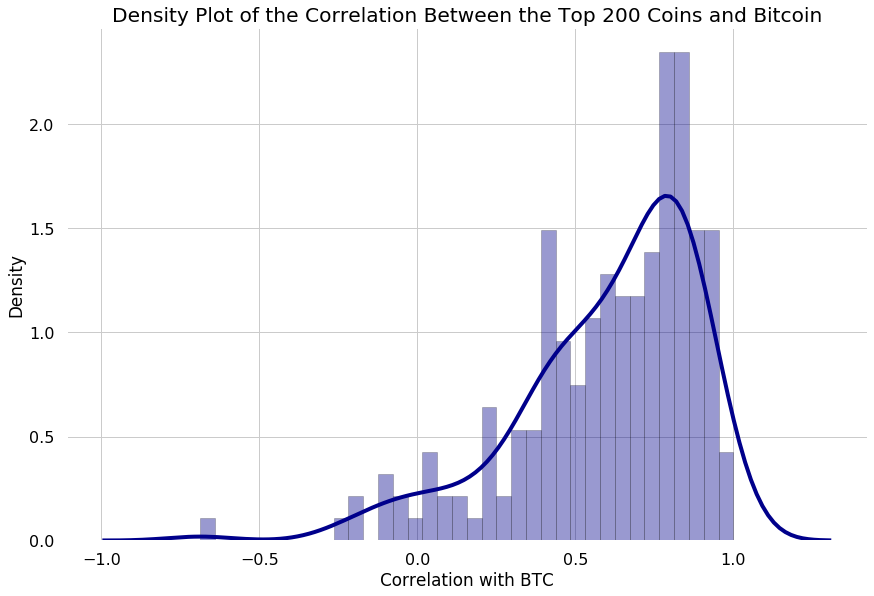

In [48]:
#Correlations DF
corr_with_bitcoin = pd.DataFrame(df_pivot[top_100_coins].corr()['bitcoin'])
corr_with_bitcoin.columns = ['corr with bitcoin']
corr_with_bitcoin = corr_with_bitcoin.sort_values(by='corr with bitcoin', ascending=True)

#Seaborn Distplot
ax = sns.distplot(corr_with_bitcoin['corr with bitcoin'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

#Graph titles and axes labels
plt.title('Density Plot of the Correlation Between the Top 200 Coins and Bitcoin')
ax.set(xlabel='Correlation with BTC', ylabel='Density')





In [49]:
# Coins least correlated with BTC
corr_with_bitcoin.columns=['Correlation to Bitcoin']
corr_with_bitcoin[0:20]

,Correlation to Bitcoin
Coin,
dai,-0.686623
rchain,-0.256544
paypex,-0.211133
nuls,-0.178693
genesis-vision,-0.111648
zilliqa,-0.102094
all-sports,-0.087901
game,-0.074591
kickico,-0.060137
